In [1]:
import numpy as np
import pandas as pd
from rdkit import Chem

from gen_chem_1D.gen_models.reinvent.tokenization import RegexTokenizer

In [2]:
df = pd.read_csv('data/lipo.csv')
df

,SMILES,lipo
0,Cn1c(CN2CCN(CC2)c3ccc(Cl)cc3)nc4ccccc14,3.54
1,COc1cc(OC)c(cc1NC(=O)CSCC(=O)O)S(=O)(=O)N2C(C)...,-1.18
2,COC(=O)[C@@H](N1CCc2sccc2C1)c3ccccc3Cl,3.69
3,OC[C@H](O)CN1C(=O)C(Cc2ccccc12)NC(=O)c3cc4cc(C...,3.37
4,Cc1cccc(C[C@H](NC(=O)c2cc(nn2C)C(C)(C)C)C(=O)N...,3.10
...,...,...
4195,OCCc1ccc(NC(=O)c2cc3cc(Cl)ccc3[nH]2)cc1,3.85
4196,CCN(C1CCN(CCC(c2ccc(F)cc2)c3ccc(F)cc3)CC1)C(=O...,3.21
4197,COc1cccc2[nH]ncc12,2.10
4198,Clc1ccc2ncccc2c1C(=O)NCC3CCCCC3,2.65


In [3]:
def get_num_mols(smi):
    smi_list = smi.split('.')
    return len(smi_list)

In [4]:
df['num_mols'] = df.SMILES.apply(get_num_mols)

In [5]:
def get_num_heavy_atoms(smi):
    mol = Chem.MolFromSmiles(smi)
    return mol.GetNumHeavyAtoms()

In [6]:
df['smi_len'] = df.SMILES.apply(len)

In [7]:
df['num_heavy_atoms'] = df.SMILES.apply(get_num_heavy_atoms)

In [8]:
df.describe()

,lipo,num_mols,smi_len,num_heavy_atoms
count,4200.000000,4200.000000,4200.000000,4200.000000
mean,2.186336,1.000714,47.497857,27.040000
std,1.203004,0.046291,15.680454,7.462365
min,-1.500000,1.000000,11.000000,7.000000
25%,1.410000,1.000000,36.000000,22.000000
50%,2.360000,1.000000,48.000000,27.000000
75%,3.100000,1.000000,57.000000,32.000000
max,4.500000,4.000000,267.000000,115.000000


In [9]:
df.query('num_mols > 1')

,SMILES,lipo,num_mols,smi_len,num_heavy_atoms
1646,O.O.O.CC(=O)O[C@@]12CO[C@@H]1C[C@H](O)[C@]3(C)...,3.4,4,162,61


<Axes: ylabel='Frequency'>

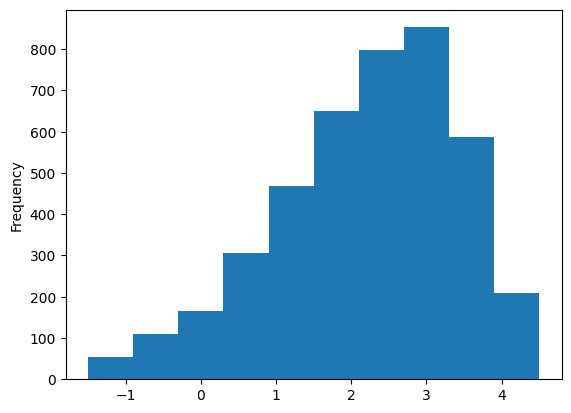

In [10]:
df.lipo.plot.hist()

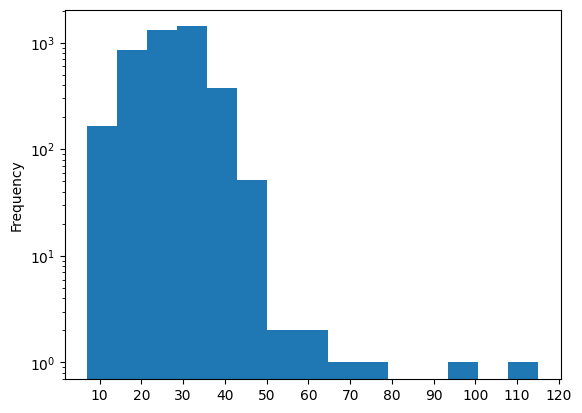

In [11]:
# so let's clean the molecules and only use 10 <= heavy atoms <= 70
ax = df.num_heavy_atoms.plot.hist(bins=15)
ax.set_yscale('log')
ax.set_xticks(np.arange(10, 130, 10));

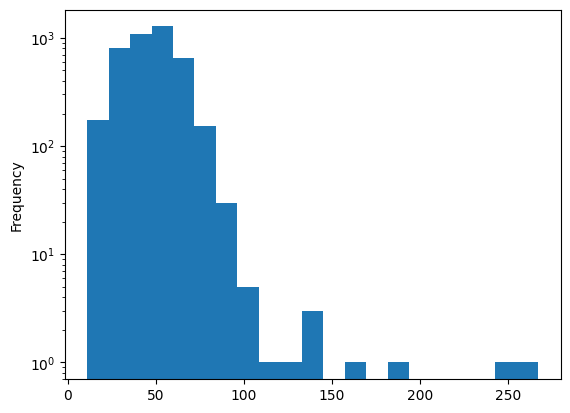

In [12]:
ax = df.smi_len.plot.hist(bins=21)
ax.set_yscale('log')

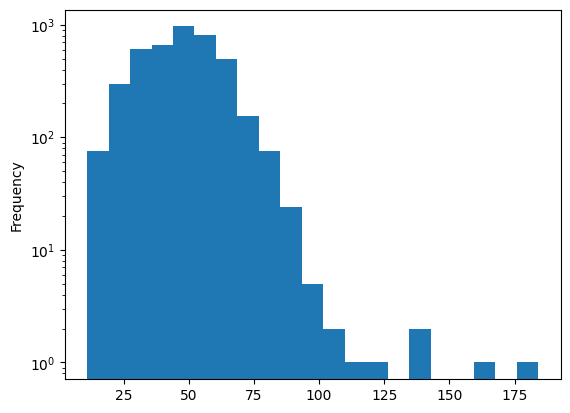

In [13]:
ax = df.query('num_heavy_atoms <= 70').smi_len.plot.hist(bins=21)
ax.set_yscale('log')

In [14]:
tokenizer = RegexTokenizer()

Even though the length of the SMILES string is relatively large (up to 184), the number of tokens is still < 120. So we can set `max_length` to 120 when sampling from the model.

CCCCCC[C@H]1OC(=O)CNC(=O)[C@H](NC(=O)[C@H](CO)NC(=O)[C@@H](NC(=O)[C@H](CC(C)C)N(C)C(=O)[C@@H]1C)[C@H](C)CC)[C@H](C)O
num heavy atoms: 46
smiles length: 116
num tokens: 82


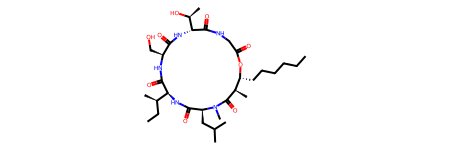

CC[C@H]1OC(=O)[C@H](C)[C@@H](O[C@H]2C[C@@](C)(OC)[C@@H](O)[C@H](C)O2)[C@H](C)[C@@H](O[C@@H]3O[C@H](C)C[C@@H]([C@H]3O)N(C)C)[C@](C)(O)C[C@@H](C)\C(=N/OCOCCOC)\[C@H](C)[C@@H](O)[C@]1(C)O
num heavy atoms: 58
smiles length: 184
num tokens: 107


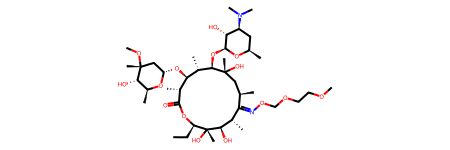

CC1(C)CCC(=C(CN2CCN(CC2)c3ccc(cc3)C(=O)NS(=O)(=O)c4ccc(N[C@H](CCN5CCOCC5)CSc6ccccc6)c(c4)S(=O)(=O)C(F)(F)F)C1)c7ccc(Cl)cc7
num heavy atoms: 65
smiles length: 122
num tokens: 117


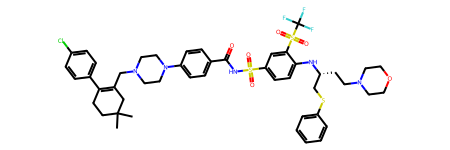

O.O.O.CC(=O)O[C@@]12CO[C@@H]1C[C@H](O)[C@]3(C)[C@@H]2[C@H](OC(=O)c4ccccc4)[C@]5(O)C[C@H](OC(=O)[C@H](O)[C@@H](NC(=O)OC(C)(C)C)c6ccccc6)C(=C([C@@H](O)C3=O)C5(C)C)C
num heavy atoms: 61
smiles length: 162
num tokens: 116


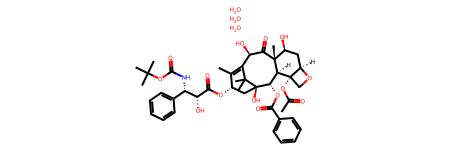

CO[C@H]1\C=C\O[C@@]2(C)Oc3c(C)c(O)c4c(O)c(NC(=O)\C(=C/C=C/[C@H](C)[C@H](O)[C@@H](C)[C@@H](O)[C@@H](C)[C@H](OC(=O)C)[C@@H]1C)\C)cc(O)c4c3C2=O
num heavy atoms: 50
smiles length: 140
num tokens: 100


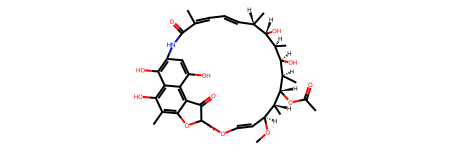

Oc1ccc2C[C@H]3N(CC4CC4)CC[C@@]56[C@@H](Oc1c25)c7[nH]c8[C@@H]9Oc%10c(O)ccc%11C[C@H]%12N(CC%13CC%13)CC[C@@]9(c%10%11)[C@@]%12(O)Cc8c7C[C@@]36O
num heavy atoms: 49
smiles length: 140
num tokens: 87


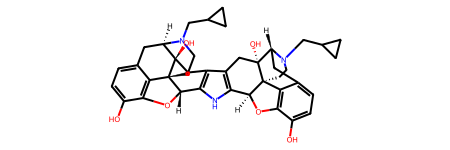

In [15]:
for i, row in df.query('num_heavy_atoms <= 70').query('smi_len > 110').iterrows():
    print(row.SMILES)
    print(f'num heavy atoms: {row.num_heavy_atoms}')
    print(f'smiles length: {row.smi_len}')
    num_tokens = len(tokenizer.tokenize(row.SMILES))
    print(f'num tokens: {num_tokens}')
    mol = Chem.MolFromSmiles(row.SMILES)
    display(mol)